<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/learning_RBFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RBF:**
 1. type of Artificial Neural Network
 2. used for function approximation problems
 3. differ from other neural networks in their three-layer architecture
 4. universal approximation
 5. faster learning speed
 6. use as a non-linear classifier
 **RBF layer:**
 - input layer: receives input data and passes it into the hidden layer.
      - consists of one neuron for every predictor variable
      - pass the value to each neuron in the hidden layer.
      - N-1 neurons are used for categorical values(N denotes the number of categories)
      -  The range of values is standardized by subtracting the median and dividing by the interquartile range.
      <br>

  **It is the n-dimensional vector that you're attempting to classify. The whole input vector is presented to each of the RBF neurons.**
 - hidden layer: where the computation occurs
      - contains a variable number of neurons (the ideal number determined by the training process).
      - Each neuron comprises a radial basis function centered on a point
      - The number of dimensions coincides with the number of predictor variables.
      - The radius or spread of the RBF function may vary for each dimension.
 - output layer or summation layer: designated for prediction tasks like classification or regression.
      - The value obtained from the hidden layer is multiplied by a weight related to the neuron and passed to the summation.
      - Here the weighted values are added up, and the sum is presented as the network's output.
      - Classification problems have one output per target category, the value being the probability that the case evaluated has that category.

 > RBF conceptually similar to K-Nearest Neighbor (k-NN) models.
    The fundamental idea of Radial Basis Functions is that an item's predicted target value is likely to be the same as other items with close values of predictor variables.

  **RBF work:**
  1. An RBF Network places one or many RBF neurons in the space described by the predictor variables.
  2. The space has multiple dimensions corresponding to the number of predictor variables present.
  3. The space has multiple dimensions corresponding to the number of predictor variables present.
  4. We calculate the Euclidean distance from the evaluated point to the center of each neuron.
  5. A Radial Basis Function (RBF), also known as kernel function, is applied to the distance to calculate every neuron's weight (influence)
  6. Weight = RBF(distance)The greater the distance of a neuron from the point being evaluated, the less influence (weight) it has.


In [ ]:
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # To create insightful plots.
from sklearn.datasets import make_classification # To generate a sample dataset, perform train-test splits, and evaluate our RBFN model.
from sklearn.model_selection import train_test_split # To standardize our dataset.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist # For calculating pairwise distances between data points.

In [ ]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)
# generate a synthetic dataset with two features and two classes.

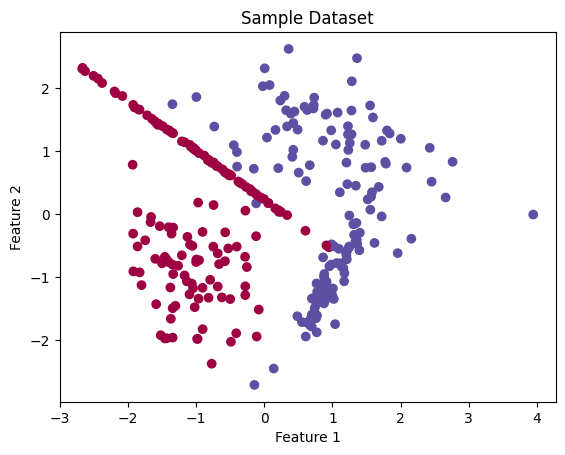

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# preprocess the data

In [ ]:
def gaussian_rbf(x, center, sigma):
    return np.exp(-cdist(x, center, 'sqeuclidean') / (2 * sigma**2))

In [ ]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X[center_indices]
rbf_width = 1.0

In [ ]:
def rbf_layer(X, rbf_centers, rbf_width):
    return gaussian_rbf(X, rbf_centers, rbf_width)

def rbfn_predict(X, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X, rbf_centers, rbf_width)
    return rbf_outputs @ weights

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbf_outputs_train = rbf_layer(X_train, rbf_centers, rbf_width)

# Perform linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(rbf_outputs_train, y_train)

# Make predictions on the test set
rbf_outputs_test = rbf_layer(X_test, rbf_centers, rbf_width)
y_pred = lr.predict(rbf_outputs_test)

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


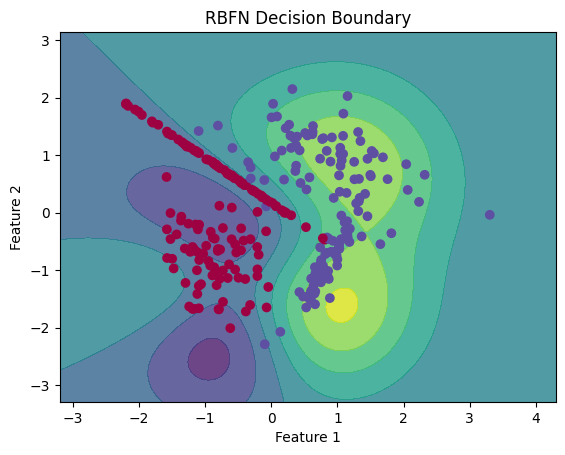

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = rbfn_predict(np.c_[xx.ravel(), yy.ravel()], rbf_centers, rbf_width, lr.coef_)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("RBFN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()